            date  precipitation  temp_max  temp_min  wind  weather
0       1/1/2012            0.0      12.8       5.0   4.7  drizzle
1       1/2/2012           10.9      10.6       2.8   4.5     rain
2       1/3/2012            0.8      11.7       7.2   2.3     rain
3       1/4/2012           20.3      12.2       5.6   4.7     rain
4       1/5/2012            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  12/27/2015            8.6       4.4       1.7   2.9     rain
1457  12/28/2015            1.5       5.0       1.7   1.3     rain
1458  12/29/2015            0.0       7.2       0.6   2.6      fog
1459  12/30/2015            0.0       5.6      -1.0   3.4      sun
1460  12/31/2015            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     

['model.sav']

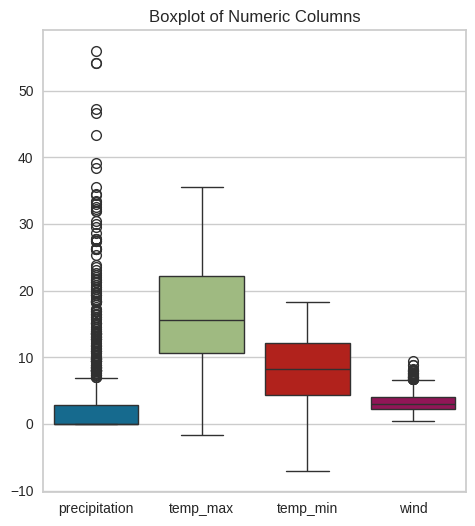

In [1]:
#Basic libraries
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Fetaure Selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Modelling Algoritm
from sklearn.cluster import KMeans

#Model Evaluation
from yellowbrick.cluster import SilhouetteVisualizer

#Load All The Data
rain = pd.read_csv('/content/seattle-weather.csv')

print(rain)

import matplotlib.pyplot as plt
import seaborn as sns

# Display summary statistics
summary_stats = rain.describe()
print(summary_stats)

# Visualize summary statistics
# Setting up the plot
plt.figure(figsize=(12, 6))

# Boxplots for numeric columns
plt.subplot(1, 2, 1)
sns.boxplot(data=rain.select_dtypes(include='number'))
plt.title('Boxplot of Numeric Columns')

# CEK NILAI NULL
print(rain.isnull())

# Menghapus baris yang mengandung nilai null
rain = rain.dropna()
print(rain)

# Pengecekan data apakah terdapat outlier
numeric_cols = rain.select_dtypes(include=['number']).columns
q1 = rain[numeric_cols].quantile(0.25)
q3 = rain[numeric_cols].quantile(0.75)
IQR = q3 - q1

# Identifikasi outlier
outliers = ((rain[numeric_cols] < (q1 - 1.5 * IQR)) | (rain[numeric_cols] > (q3 + 1.5 * IQR))).any(axis=1)
cust_shop = rain[~outliers]
print(cust_shop)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Menentukan kolom target
target_column = 'weather'

# Membagi dataset menjadi fitur dan target
X = cust_shop.drop(target_column, axis=1)
y = cust_shop[target_column]

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menentukan kolom numerik untuk pre-processing
numeric_features = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Membuat pipeline untuk pre-processing kolom numerik
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Menggabungkan pipeline dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features)
    ])

# Menerapkan preprocessing pada data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Mengecek bentuk dari data yang sudah diproses
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Import svm model
from sklearn import metrics, svm
#Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
svm_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = svm_model.predict(X_test)

print(y_pred)

#MEMANGGIL AKURASI SVM
print("Akurasi Metode SVM:",metrics.accuracy_score(y_test, y_pred))

joblib.dump(svm_model, 'model.sav')